### PART 1-1 OF THE ASSIGNMENT

In [1]:
import os
import re
import nltk
import spacy
import spacy.displacy
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from collections import Counter
from nltk.stem import PorterStemmer, LancasterStemmer
from nltk.probability import FreqDist

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ecede\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ecede\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
base_dir = "Part_I_1-2"  # Defining the folder where all text files are stored for the first part.
text_files = [os.path.join(base_dir, f) for f in os.listdir(base_dir) if f.endswith(".txt")] # In order to first list all text files from the directory, filtering out the txts and then creting the full path for each file.

def read_and_clean_text(file_path): # Defining a function that:
    with open(file_path, "r", encoding="utf-8") as file:
        text = file.read() # Reads the file from file_path,
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Removing punctuation as well as,
    text = re.sub(r"\s+", " ", text).strip()  # Removing spaces,
    return text.lower()  # Converting everything to lowercase.

In [3]:
# Creating an empty dictionary to store word frequencies for each file
word_frequencies = {}
total_words = []  # This list will store all words from all files to compute total frequency

for file in text_files:
    text = read_and_clean_text(file)  # Reads the file and apply the function that cleans the text
    words = word_tokenize(text)  # Splits the now cleaned texts into tokens
    words = [word for word in words if word not in stopwords.words('english')]  # Removing stopwords in order to be left only with meaninful ones

    freq_dist = FreqDist(words) # It tells us the frequency of each vocabulary item in the text (based on NLTK book).
    word_frequencies[file] = freq_dist # Stores this frequency count inside the word_frequencies dictionary we created earlier

    total_words.extend(words) # Adding words to total list for overall frequency count, combining words from all files so that we can later compute word frequency across the entire dataset.
    
total_freq = FreqDist(total_words) # Creating a single frequency distribution for all words from all files combined

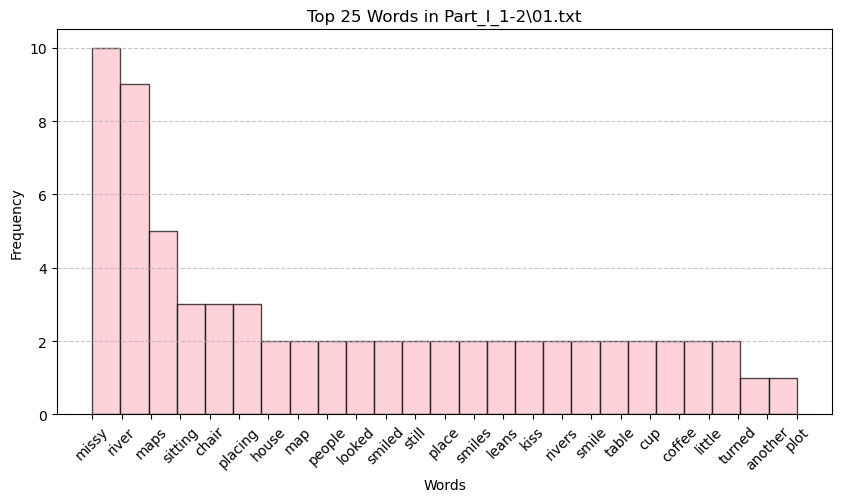

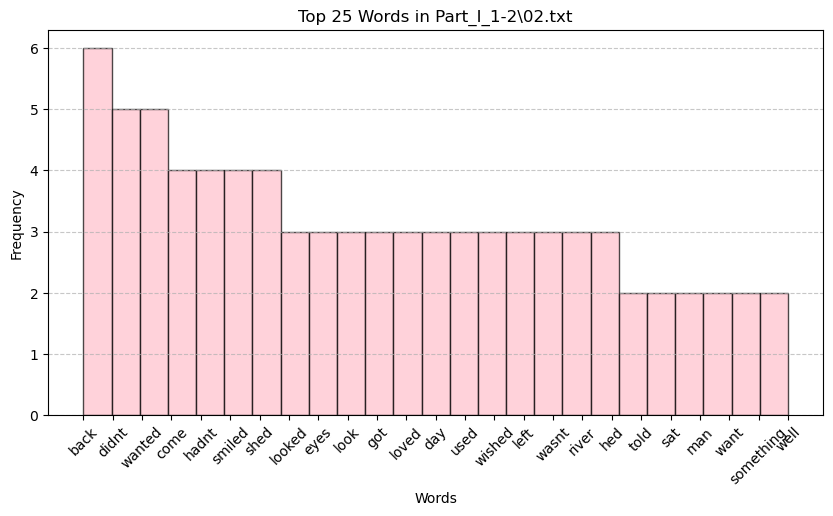

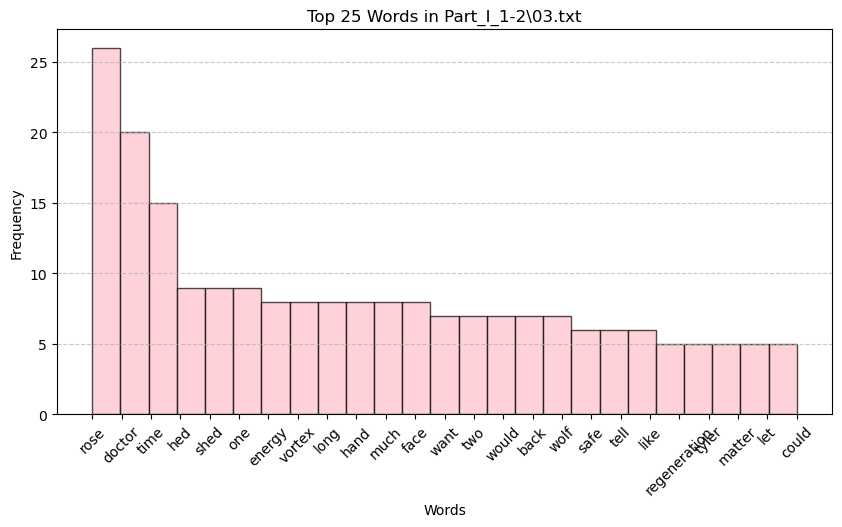

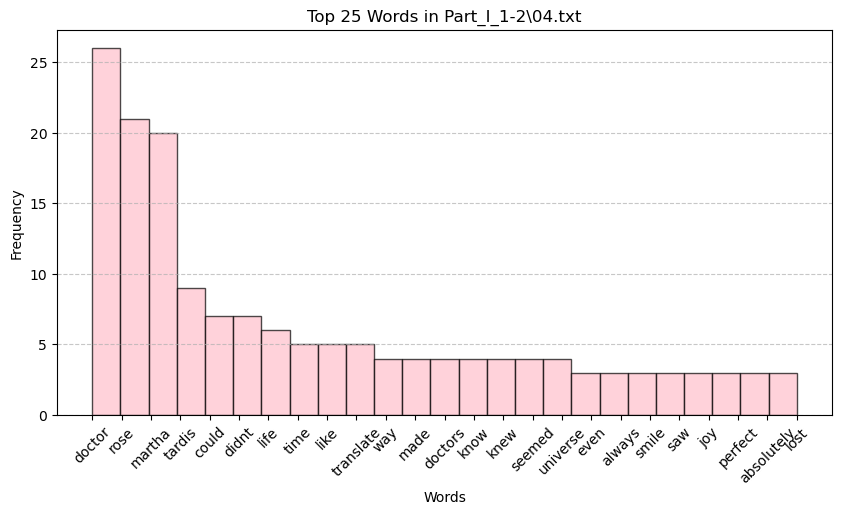

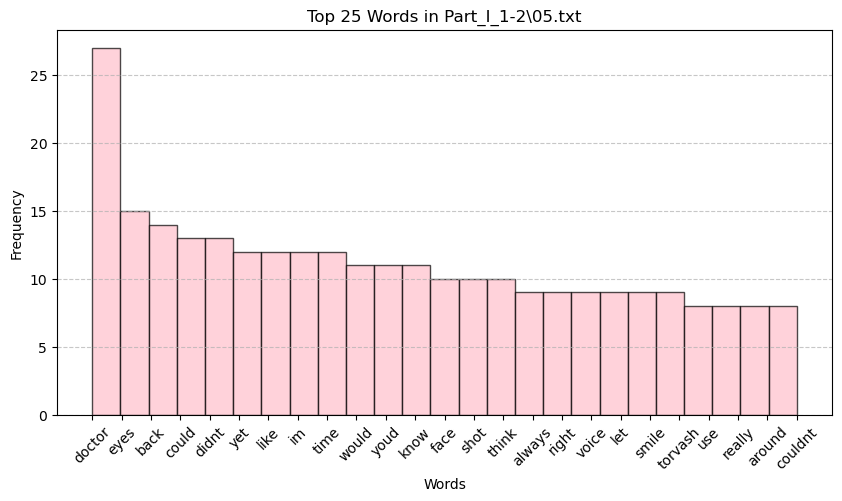

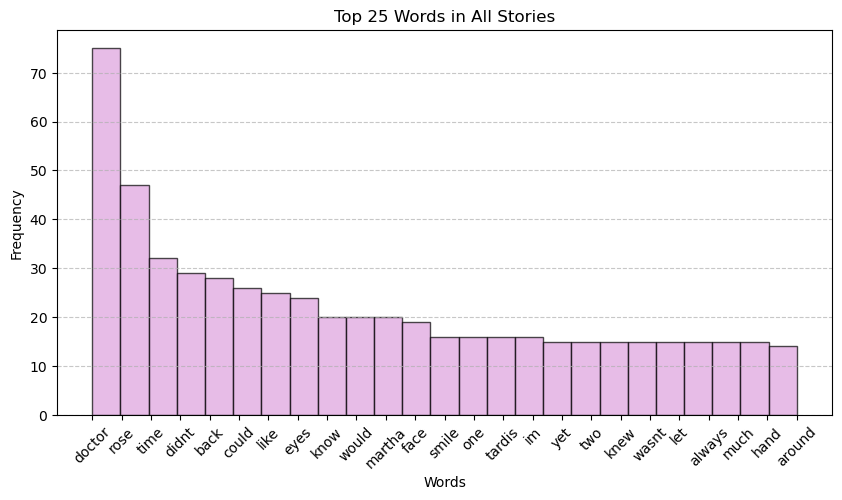

In [4]:
# Plot histograms for each file
for file, freq_dist in word_frequencies.items():  # Loop through each file's word frequency distribution
    most_common_words = freq_dist.most_common(25)  # Retrieving the 25 most frequent words along with their counts
    words = [word for word, count in most_common_words]  # Extracting only the words
    counts = [count for word, count in most_common_words]  # Extracting only the counts

    plt.figure(figsize=(10, 5))
    plt.hist(words, weights=counts, bins=len(words), color='pink', edgecolor='black', alpha=0.7)  # Creating a histogram to visualize word frequency
    plt.xticks(rotation=45)  # Rotating the x-axis labels to achieve better readability
    plt.xlabel("Words")  # Label for x-axis
    plt.ylabel("Frequency")  # Label for y-axis
    plt.title(f"Top 25 Words in {file}")  # Setting the title (defined for each file separately)
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # To add grid lines to y-axis
    plt.show()

# Plot histogram for total word frequency across all files
most_common_words_total = total_freq.most_common(25)  # Retrieving the 25 most frequent words across all files
words_total = [word for word, count in most_common_words_total]  # Extracting only the words
counts_total = [count for word, count in most_common_words_total]  # Extracting only the counts

plt.figure(figsize=(10, 5))
plt.hist(words_total, weights=counts_total, bins=len(words_total), color='plum', edgecolor='black', alpha=0.7)  # Creating a histogram for all stories
plt.xticks(rotation=45)  # Rotating the x-axis labels to achieve better readability
plt.xlabel("Words")  # Label for x-axis
plt.ylabel("Frequency")  # Label for y-axis
plt.title("Top 25 Words in All Stories")  # Setting the title
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding grid lines to y-axis
plt.show()

### PART 1-2 OF THE ASSIGNMENT

In [5]:
def apply_stemming(words): # Creating a function that applies stemming to a list of words using two different stemmers,
    porter = PorterStemmer() # Porter Stemmer is more conservative
    lancaster = LancasterStemmer() # Lancaster Stemmer is more aggressive compared to Porter Stemmer
    # Using list comprehensions to apply stemming to each word in words.
    porter_stemmed = [porter.stem(word) for word in words]  # This runs the Porter Stemmer stores the results
    lancaster_stemmed = [lancaster.stem(word) for word in words] # This runs the Lancaster Stemmer and stores the results
    return porter_stemmed, lancaster_stemmed

Porter Stemming in Part_I_1-2\01.txt: [('look', 4), ('smile', 3), ('map', 2), ('normal', 2), ('river', 2), ('point', 2), ('place', 2), ('cup', 2), ('bit', 2), ('anoth', 1)]
Lancaster Stemming in Part_I_1-2\01.txt: [('look', 4), ('smil', 3), ('map', 2), ('norm', 2), ('riv', 2), ('point', 2), ('plac', 2), ('cup', 2), ('bit', 2), ('anoth', 1)]


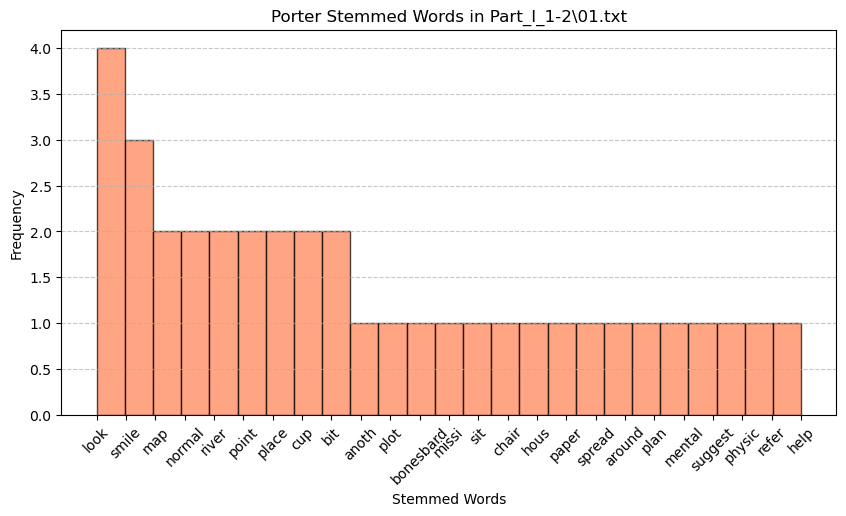

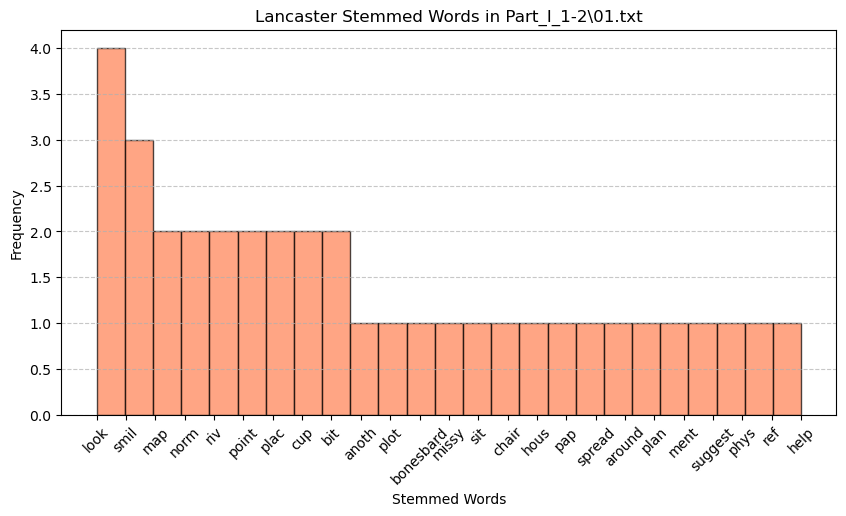

Porter Stemming in Part_I_1-2\02.txt: [('look', 2), ('come', 2), ('think', 2), ('love', 2), ('want', 2), ('know', 2), ('whisper', 2), ('smile', 2), ('children', 2), ('visit', 2)]
Lancaster Stemming in Part_I_1-2\02.txt: [('look', 2), ('com', 2), ('think', 2), ('got', 2), ('lov', 2), ('want', 2), ('know', 2), ('whisp', 2), ('ev', 2), ('fast', 2)]


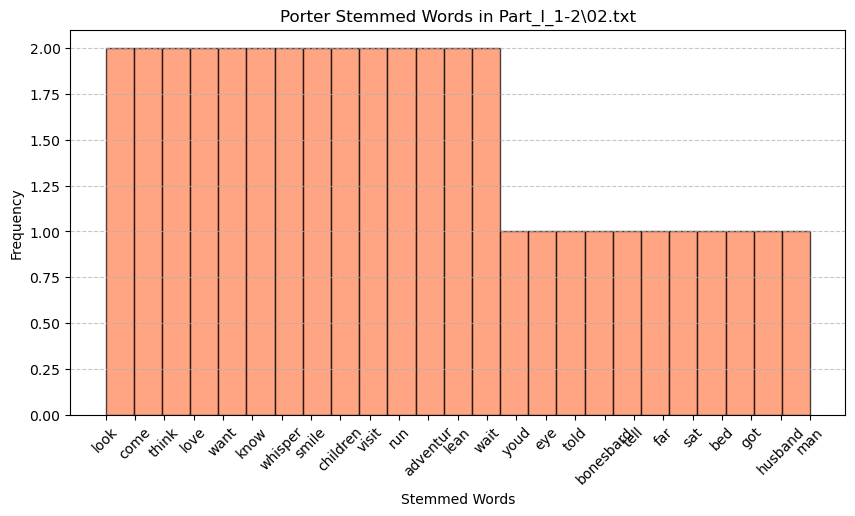

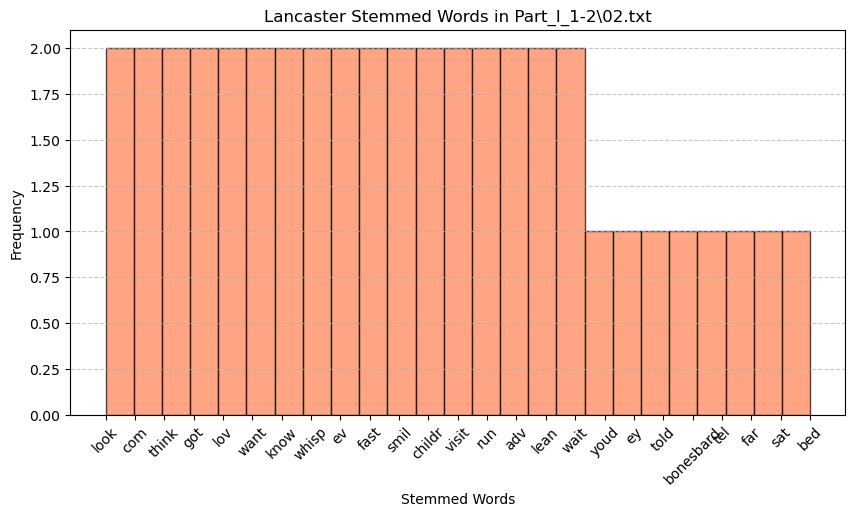

Porter Stemming in Part_I_1-2\03.txt: [('want', 3), ('kiss', 3), ('love', 3), ('face', 3), ('see', 3), ('chang', 3), ('regener', 2), ('continu', 2), ('build', 2), ('swirl', 2)]
Lancaster Stemming in Part_I_1-2\03.txt: [('want', 3), ('ev', 3), ('reg', 3), ('long', 3), ('kiss', 3), ('lov', 3), ('fac', 3), ('see', 3), ('chang', 3), ('com', 3)]


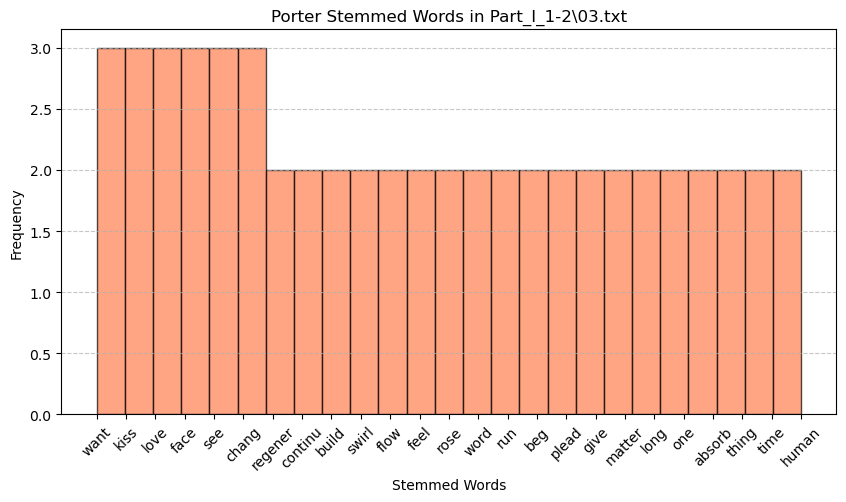

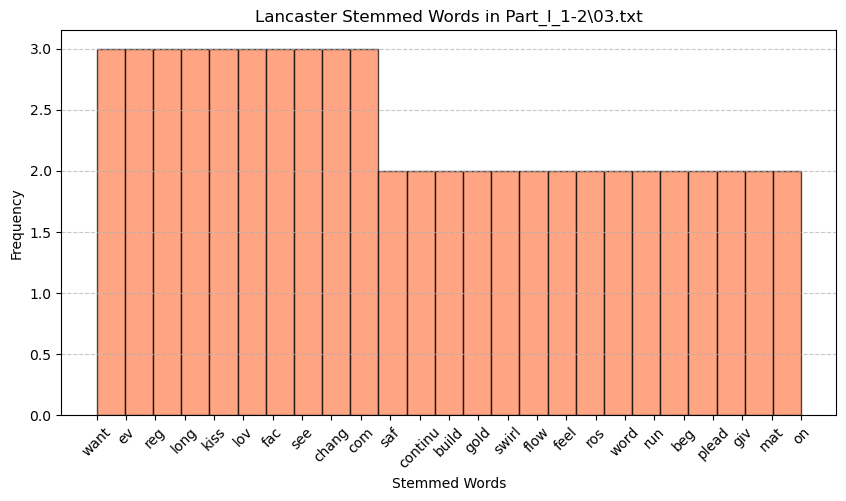

Porter Stemming in Part_I_1-2\04.txt: [('love', 3), ('repair', 3), ('languag', 2), ('rose', 2), ('smile', 2), ('joy', 2), ('absolut', 2), ('doctor', 2), ('live', 2), ('genuin', 2)]
Lancaster Stemming in Part_I_1-2\04.txt: [('lov', 3), ('repair', 3), ('ev', 2), ('langu', 2), ('ros', 2), ('smil', 2), ('joy', 2), ('absolv', 2), ('doct', 2), ('liv', 2)]


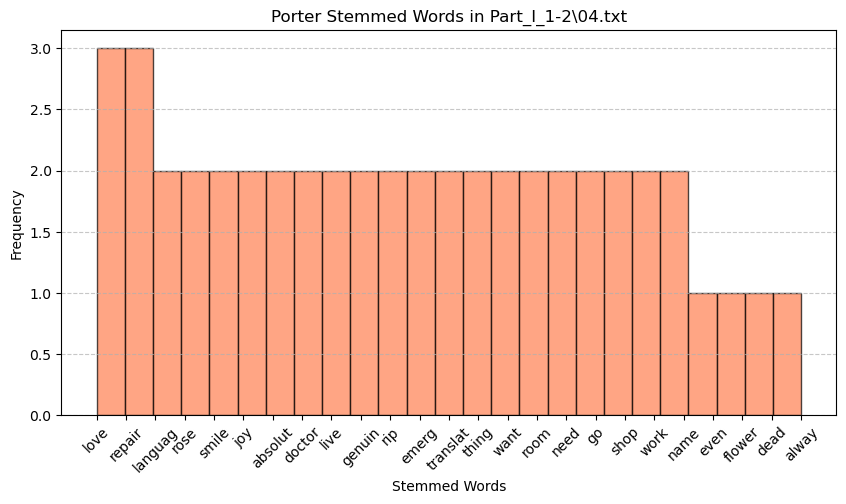

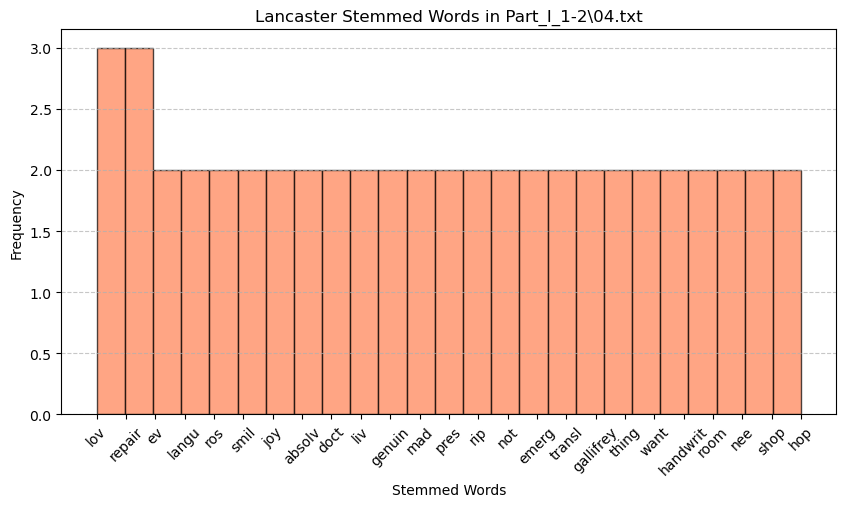

Porter Stemming in Part_I_1-2\05.txt: [('call', 4), ('breath', 4), ('play', 4), ('differ', 3), ('travel', 3), ('time', 3), ('point', 3), ('eye', 3), ('look', 3), ('hope', 3)]
Lancaster Stemming in Part_I_1-2\05.txt: [('act', 5), ('man', 4), ('us', 4), ('real', 4), ('cal', 4), ('play', 4), ('diff', 3), ('op', 3), ('travel', 3), ('tru', 3)]


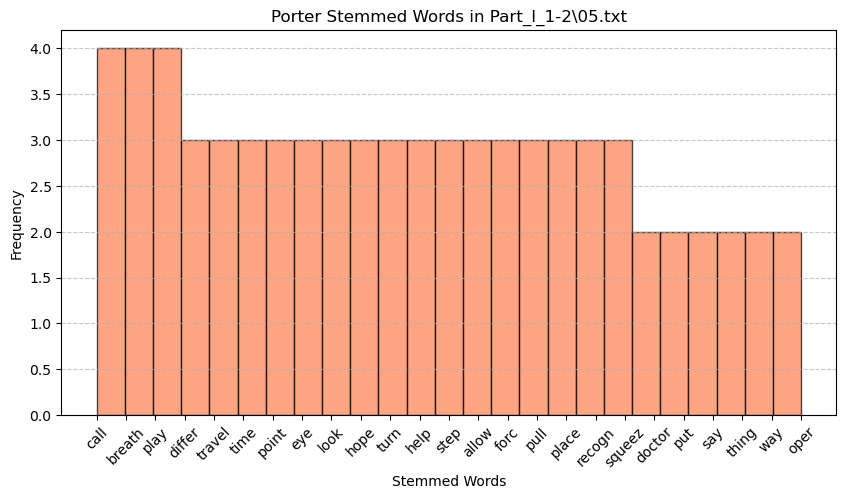

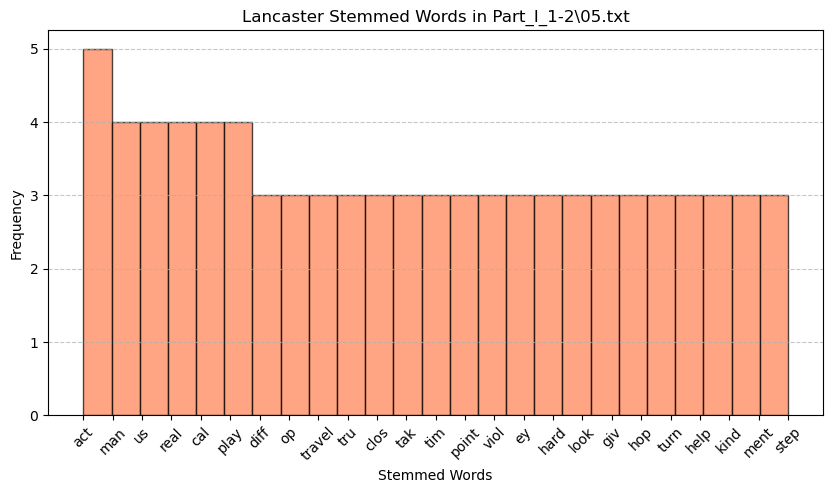

In [6]:
def plot_word_frequencies_histogram(freq_dist, title): # Again, defining a function that takes word frequency distribution as well as the title that will appear on histogram
    most_common_words = freq_dist.most_common(25)  # Retrieving the 25 most frequent words along with their counts,
    words = [word for word, count in most_common_words]   # Extractimng only the words
    counts = [count for word, count in most_common_words]   # Extracting only the counts

    plt.figure(figsize=(10, 5))
    plt.hist(words, weights=counts, bins=len(words), color='coral', edgecolor='black', alpha=0.7)  # Creating a histogram
    plt.xticks(rotation=45)  # Rotating the x-axis labels to achieve better readability
    plt.xlabel("Stemmed Words")  # Label for x-axis
    plt.ylabel("Frequency")  # Label for y-axis
    plt.title(title)  # Setting the title (defined in the function beforehand)
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # To add grid lines to y-axis
    plt.show()

for file in word_frequencies: # In order to loop through each file in word_frequencies,
    words = list(word_frequencies[file].keys())  # Extracting all words from the file using .keys() method
    porter_stemmed, lancaster_stemmed = apply_stemming(words)  # Applying both stemmers to get both Porter & Lancaster stemmed versions of the words.

    porter_freq = FreqDist(porter_stemmed) # Creating a word frequency distribution for Porter-stemmed words
    lancaster_freq = FreqDist(lancaster_stemmed) # Creating a word frequency distribution for Lancaster-stemmed words

    print(f"Porter Stemming in {file}: {porter_freq.most_common(10)}")
    print(f"Lancaster Stemming in {file}: {lancaster_freq.most_common(10)}")
    # Calling plot_word_frequencies_histogram() twice,
    plot_word_frequencies_histogram(porter_freq, f"Porter Stemmed Words in {file}") # Once for Porter-stemmed words,
    plot_word_frequencies_histogram(lancaster_freq, f"Lancaster Stemmed Words in {file}")  # Once for Lancaster-stemmed words,
    # So that we generates two histograms per file, to visualize the difference between Porter vs. Lancaster stemmers.

### PART 2 OF THE ASSIGNMENT

In [7]:
# Since our 3 text files contain English, German, and Dutch texts, we need the appropriate model for each language, so we load them.
nlp_models = {
    "de": spacy.load("de_core_news_sm"), # German Model
    "en": spacy.load("en_core_web_sm"), # English Model
    "nl": spacy.load("nl_core_news_sm"), # Dutch Model
}

# We need to search both directories for this task
dirs = ["Part_I_3", "Part_I_1-2"]
text_files = [os.path.join(d, f) for d in dirs for f in os.listdir(d) if f.endswith(".txt")]  # Creating a list of directories containing .txt files we need

# Creating a dictionary that  matches filenames to languages so that we use the correct spaCy model for POS tagging
language_models = {
    "pg30165": "de", "pg74": "en", "pg18381": "nl",  # Translations of Tom Sawyer
    "01": "en", "02": "en", "03": "en", "04": "en", "05": "en"  # Text art files
}

pos_results = {}  # Creating an empty dictionary called pos_results to store POS tag counts for each file.

for file in text_files:
    filename = os.path.basename(file).split(".")[0]  # Extract filenames without the extension

    language = language_models[filename]  # Gets the correct language model

    with open(file, "r", encoding="utf-8") as f:  # Open the text file in read mode with UTF-8 encoding
        text = f.read()  # Read the entire content of the file into a string.

    # POS Tagging section:
    doc = nlp_models[language](text)  # doc object stores processed text information
    pos_counts = Counter(token.pos_ for token in doc)  # Counts how many times each POS tag appears in the text
    pos_results[file] = pos_counts  # Stores POS tag counts in the pos_results dictionary

    print(f"\n POS Tag Counts for {file} ({language}): {pos_counts}")  # Printing POS tag frequencies


 POS Tag Counts for Part_I_3\pg18381.txt (nl): Counter({'PUNCT': 13946, 'NOUN': 11919, 'VERB': 11768, 'PRON': 10021, 'ADP': 8792, 'SPACE': 7215, 'DET': 7113, 'ADV': 5761, 'ADJ': 5048, 'AUX': 3839, 'CCONJ': 3502, 'PROPN': 3464, 'SCONJ': 1999, 'NUM': 392, 'INTJ': 365, 'SYM': 351, 'X': 23})

 POS Tag Counts for Part_I_3\pg30165.txt (de): Counter({'PUNCT': 18420, 'NOUN': 11126, 'VERB': 9484, 'ADV': 9283, 'PRON': 8788, 'DET': 7470, 'SPACE': 6647, 'ADP': 5279, 'AUX': 3752, 'CCONJ': 3365, 'ADJ': 2923, 'PROPN': 2183, 'PART': 1683, 'SCONJ': 1518, 'NUM': 311, 'X': 221, 'INTJ': 208})

 POS Tag Counts for Part_I_3\pg74.txt (en): Counter({'PUNCT': 15329, 'NOUN': 12177, 'VERB': 11308, 'PRON': 10285, 'ADP': 7282, 'DET': 6870, 'SPACE': 6409, 'ADV': 4892, 'ADJ': 4408, 'AUX': 4389, 'CCONJ': 3851, 'PROPN': 3017, 'PART': 2090, 'SCONJ': 1808, 'NUM': 645, 'INTJ': 475, 'X': 73, 'SYM': 1})

 POS Tag Counts for Part_I_1-2\01.txt (en): Counter({'PUNCT': 60, 'NOUN': 54, 'VERB': 48, 'PRON': 34, 'DET': 33, 'ADP':

### PART 3 OF THE ASSIGNMENT

In [8]:
# Define the base directory to search
base_dir = "Part_I_1-2"

# Searching the specified base directory and collecting files
dr_who_files = {"01", "02", "03", "04", "05"}

text_files = [
    os.path.join(base_dir, f) for f in os.listdir(base_dir) 
    if f.endswith(".txt") and os.path.splitext(f)[0] in dr_who_files
]

ner_results = {}  # Creating an empty dictionary to store NER results

for file in text_files:
    filename = os.path.basename(file).split(".")[0]  # Extract filenames without the extension

    with open(file, "r", encoding="utf-8") as f:  # Open the text file in read mode with UTF-8 encoding
        text = f.read()  # Read the entire content of the file into a string.

    # NER Processing section:
    doc = nlp(text)  # doc object stores processed text information
    ner_entities = [(ent.text, ent.label_) for ent in doc.ents]  # Extracting named entities
    ner_results[file] = ner_entities  # Storing the results

    print(f"\n Named Entities for {file} (English): {ner_entities[:10]}")  # Printing first 10 NER results


Named Entities for Part_I_1-2\01.txt (English): [('Missy', 'PERSON'), ('River', 'LOC'), ('Missy', 'PERSON'), ('Mary Poppins', 'PERSON'), ('River', 'LOC'), ('River', 'PRODUCT'), ('River', 'LOC'), ('Missy', 'PERSON'), ('Missy', 'PERSON'), ('Missy', 'ORG')]

Named Entities for Part_I_1-2\02.txt (English): [('these day', 'DATE'), ('one day', 'DATE'), ('a few years', 'DATE'), ('1969', 'DATE'), ('New York', 'GPE'), ('three', 'CARDINAL'), ('second', 'ORDINAL'), ('an hour or', 'TIME'), ('one', 'CARDINAL'), ('three', 'CARDINAL')]

Named Entities for Part_I_1-2\03.txt (English): [('Rose Tyler', 'PERSON'), ('My Doctor', 'WORK_OF_ART'), ('Rose', 'PERSON'), ('one', 'CARDINAL'), ('Rose Tyler', 'PERSON'), ('Two', 'CARDINAL'), ('two', 'CARDINAL'), ('two', 'CARDINAL'), ('Rose Tyler', 'PERSON'), ('Barcelona', 'GPE')]

Named Entities for Part_I_1-2\04.txt (English): [('Rose', 'PERSON'), ('the Time War', 'EVENT'), ('Rose', 'PERSON'), ('Rose', 'PERSON'), ('Donna', 'PERSON'), ('TARDIS', 'ORG'), ('Martha', 

In [9]:
# Manually selected sentences corresponding to manual_annotations (only English)
manual_sentences = {
    "01.txt": "Missy smiled, still in her Mary Poppins looking outfit, River looked over at the maps. River walked out of the bedroom.",
    "02.txt": "She wanted to know how her parents were in New York, because what he was mostly talking about was 1969, she sat in the garden. River hadn’t gotten lots of sleep since he visited.",
    "03.txt": '"Not the city Barcelona, the planet Barcelona." The only thing, as it had been for some time now- was Rose Tyler.',
    "04.txt": "The TARDIS wasn’t meant to translate Gallifreyan to other languages. After the Time War, the Doctor felt torn apart inside.",
    "05.txt": "The Torvash was left unconscious on the ground. You wished you could pass out, to give a glimpse of rest to your aching body, but of course it would take more than that to tire a Time Lord.",
}

# Manually annotated named entities
manual_annotations = {
    "01.txt": [("Missy", "PERSON"), ("Mary Poppins", "PERSON"), ("River", "PERSON"), ("bedroom", "LOC")],
    "02.txt": [("1969", "DATE"), ("New York", "GPE"), ("garden", "LOC"), ("River", "PERSON")],
    "03.txt": [("Barcelona", "GPE"), ("planet Barcelona", "LOC"), ("Rose Tyler", "PERSON")],
    "04.txt": [("TARDIS", "PRODUCT"), ("Gallifreyan", "NORP"), ("Time War", "EVENT"), ("Doctor", "PERSON")],
    "05.txt": [("Torvash", "PERSON"), ("Time Lord", "TITLE")],
}

def convert_to_dictionary(entities):  # Converting the list of entity tuples into a dictionary {entity_text: entity_label}
    return {text: label for text, label in entities}  

automatic_ner_results = {}  # Defining a dictionary to store automatic NER results

for file, sentence in manual_sentences.items():  
    filename = file.split(".")[0]  # Extracts filenames without extension

    # Process only English files
    doc = nlp(sentence)  # Process the sentence using the English model
    auto_entities = [(ent.text, ent.label_) for ent in doc.ents]  # Extracting the detected entities
    automatic_ner_results[file] = auto_entities  # Storing the results

    print("File:", file)  # Printing the file name
    print("Sentence:", sentence)  # Printing the sentence used for NER
    
    print("-" * 20)  # Separator for readability

    print("Manual Entities:")  # Printing manually annotated entities
    for entity, label in manual_annotations[file]:  
        print(entity, "-", label)  
        
    print("-" * 20)  # Separator for readability
    
    print("spaCy Detected Entities:")  # Printing automatically detected entities
    for entity, label in auto_entities:  
        print(entity, "-", label)  
        
    print("-" * 20)  # Separator for readability
    
    print("spaCy Missed Entities:")
    missed_entities = [(entity, label) for entity, label in manual_annotations[file] if entity not in dict(auto_entities)]  # Identifying the missed entities and printing them
    for entity, label in missed_entities:  
        print(entity, "-", label)

    print("-" * 20)  # Separator for readability

File: 01.txt
Sentence: Missy smiled, still in her Mary Poppins looking outfit, River looked over at the maps. River walked out of the bedroom.
--------------------
Manual Entities:
Missy - PERSON
Mary Poppins - PERSON
River - PERSON
bedroom - LOC
--------------------
spaCy Detected Entities:
Mary Poppins - PERSON
River - LOC
--------------------
spaCy Missed Entities:
Missy - PERSON
bedroom - LOC
--------------------
File: 02.txt
Sentence: She wanted to know how her parents were in New York, because what he was mostly talking about was 1969, she sat in the garden. River hadn’t gotten lots of sleep since he visited.
--------------------
Manual Entities:
1969 - DATE
New York - GPE
garden - LOC
River - PERSON
--------------------
spaCy Detected Entities:
New York - GPE
1969 - DATE
--------------------
spaCy Missed Entities:
garden - LOC
River - PERSON
--------------------
File: 03.txt
Sentence: "Not the city Barcelona, the planet Barcelona." The only thing, as it had been for some time no

In [11]:
from sklearn.metrics import classification_report

true_labels = []  # Extracting true and,
predicted_labels = []  # Predicted labels from annotations and storing them.

for file, manual_entities in manual_annotations.items():
    auto_entities = automatic_ner_results.get(file, [])  # Get the auto-detected entities

    manual_dictionary = {text: label for text, label in manual_entities}  # Convert the entity lists to dictionaries {entity_text: entity_label}
    auto_dictionary = {text: label for text, label in auto_entities}

    all_entities = set(manual_dictionary.keys()).union(set(auto_dictionary.keys()))  # Get all entities (combination of manual and automatic ones)

    for entity in all_entities:
        true_labels.append(manual_dictionary.get(entity, "O"))  # "O" means no entity
        predicted_labels.append(auto_dictionary.get(entity, "O"))

print(classification_report(true_labels, predicted_labels, zero_division=1))  # Finally printing the classification report

              precision    recall  f1-score   support

        DATE       1.00      1.00      1.00         1
       EVENT       0.00      0.00      0.00         1
         GPE       1.00      1.00      1.00         2
         LOC       0.00      0.00      0.00         3
        NORP       1.00      0.00      0.00         1
           O       0.00      0.00      0.00         1
         ORG       0.00      1.00      0.00         0
      PERSON       0.75      0.43      0.55         7
     PRODUCT       1.00      0.00      0.00         1
       TITLE       1.00      0.00      0.00         1

    accuracy                           0.33        18
   macro avg       0.57      0.34      0.25        18
weighted avg       0.62      0.33      0.38        18

